# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



# Summary

This dataset was collected by Allison and Cicchetti in 1976 for a study about mammels sleep patterns to analyze the relationship between an animals physical and ecological characteristics.

Features:
* body_weight (kg)
* brain_weight (g)
* max_life_span (years)
* gestation_time (days)
* total_sleep (hours/day)
* ecological Indices (1-5 scale)
    * predation_index (likelihood of being preyed upon)
    * sleep_exposure_index (how exposed they are while sleeping)
    * danger_index (overall danger)

I couldn't find any datasets that were good about topics that I really found interesting, so I went with this dateset because of how accesable the data was and I thought it'd be cool to learn about the topic.

# Five Interesting Questions

* Do animals in greater danger sleep less?
* Is there a correlation between brain size and life span?
* Do animals with higher sleep exposure have longer life spans?
* Does body weight affect gestation time?
* How is the "Predation Index" distributed?

note:dataset_2191_sleep.csv

In [81]:
import pandas as pd

sleep_df = pd.read_csv('dataset_2191_sleep.csv', na_values='?') # slops ? making data be strings

sleep_df['total_sleep'] = pd.to_numeric(sleep_df['total_sleep'], errors='coerce') # values to ints

sleep_df.head()

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,6654.000,5712.0,38.6,645.0,3,5,3,3.3
1,1.000,6.6,4.5,42.0,3,1,3,8.3
2,3.385,44.5,14.0,60.0,1,1,1,12.5
3,0.920,5.7,NaN,25.0,5,2,3,16.5
4,2547.000,4603.0,69.0,624.0,3,5,4,3.9


In [82]:
sleep_df.tail()

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
57,2.000,12.3,7.5,200.0,3,1,3,5.4
58,0.104,2.5,2.3,46.0,3,2,2,15.8
59,4.190,58.0,24.0,210.0,4,3,4,10.3
60,3.500,3.9,3.0,14.0,2,1,1,19.4
61,4.050,17.0,13.0,38.0,3,1,1,NaN


<Axes: title={'center': 'Average Sleep by Danger Level (1-5)'}, xlabel='Total Sleep (Hours)', ylabel='Danger Category (1=Least, 5=Most)'>

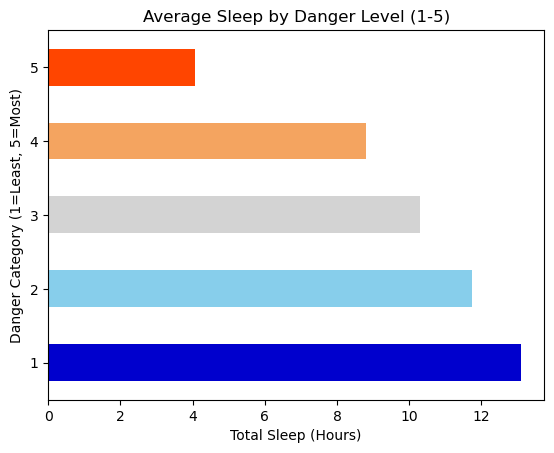

In [83]:
custom_colors = ['mediumblue', 'skyblue', 'lightgrey', 'sandybrown', 'orangered']

danger_to_sleep = sleep_df.groupby('danger_index')['total_sleep'].mean()
danger_to_sleep.plot(kind='barh', 
                     title='Average Sleep by Danger Level (1-5)',
                     ylabel='Danger Category (1=Least, 5=Most)',
                     xlabel='Total Sleep (Hours)', color=custom_colors)

# Q1 - Do Animals in greater danger sleep less?

Against my intrusic thought, the data shows that animals that are less preditory sleep more while preditors sleep less. I would wonder if these sleep hours are only being evaluated at night when some preditors would choose to sleep during day to hunt at night.

<Axes: title={'center': 'Brain Weight vs. Max Life Span'}, xlabel='Brain Weight (g)', ylabel='Max Life Span (years)'>

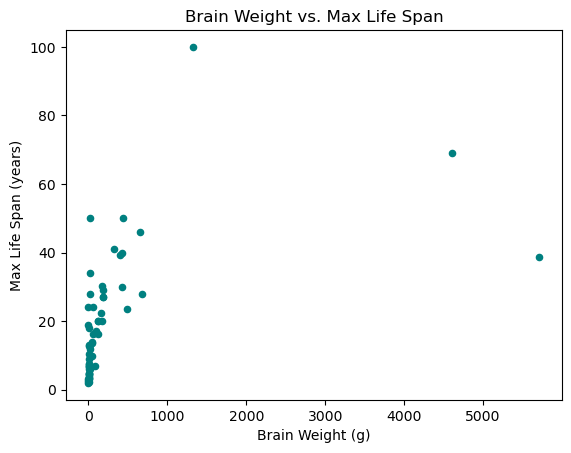

In [84]:
correlation = sleep_df['brain_weight'].corr(sleep_df['max_life_span'])

sleep_df.plot(kind='scatter', 
              x='brain_weight', 
              y='max_life_span', 
              title='Brain Weight vs. Max Life Span',
              xlabel='Brain Weight (g)',
              ylabel='Max Life Span (years)',
              color='teal')

In [85]:
sleep_df['brain_bin'] = pd.qcut(sleep_df['brain_weight'], q=3, labels=['Light', 'Medium', 'Heavy'])
sleep_df['life_bin'] = pd.qcut(sleep_df['max_life_span'], q=3, labels=['Short', 'Medium', 'Long'])

pd.crosstab(sleep_df['brain_bin'], sleep_df['life_bin'])

life_bin,Short,Medium,Long
brain_bin,,,
Light,14,3,1
Medium,6,9,4
Heavy,0,7,14


# Q2 - Is there a correlation between brain size and life span?

The scatter plot and crosstab both shows animals with larger brains generally tend to have longer life spans.

In [86]:
sleep_df['max_life_span'].describe()

count     58.000000
mean      19.877586
std       18.206255
min        2.000000
25%        6.625000
50%       15.100000
75%       27.750000
max      100.000000
Name: max_life_span, dtype: float64

<Axes: title={'center': 'Sleep Exposure vs Max Life Span'}, xlabel='Sleep Exposure Index (1=Least, 5=Most)', ylabel='Max Life Span (Years)'>

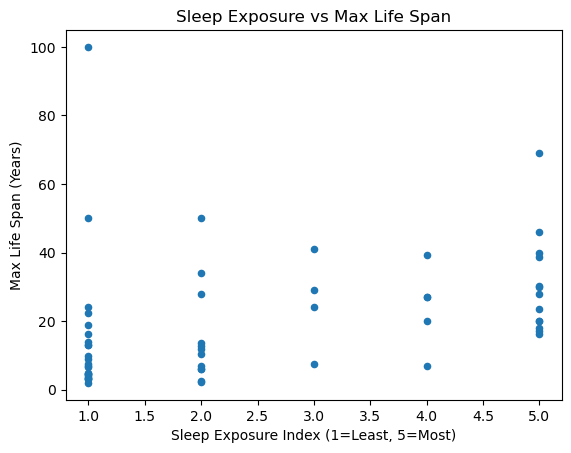

In [87]:
exposure_life_corr = sleep_df['sleep_exposure_index'].corr(sleep_df['max_life_span'])

sleep_df.plot(kind='scatter', 
              x='sleep_exposure_index', 
              y='max_life_span', 
              title='Sleep Exposure vs Max Life Span', 
              xlabel='Sleep Exposure Index (1=Least, 5=Most)', 
              ylabel='Max Life Span (Years)')

# Q3 - Do animals with higher sleep exposure have longer life spans?

We can see that very few animals with good sleep exposure live less than the mean, but I don't think anything conclusive can be said. However on the opposite end animals with lower sleep exposure generally tend to have shorter life spans.

<Axes: title={'center': 'Body Weight vs. Gestation Time'}, xlabel='Body Weight (kg)', ylabel='Gestation Time (days)'>

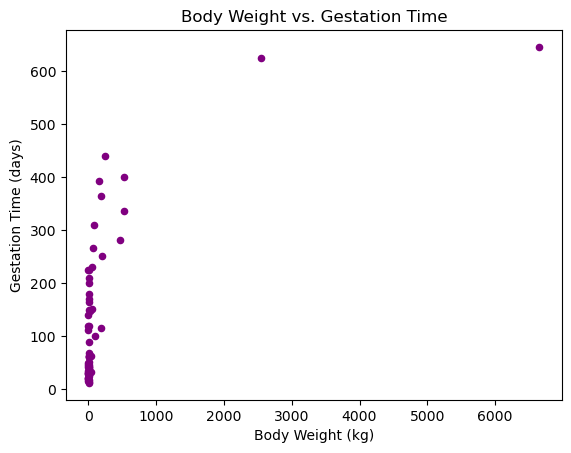

In [88]:
gestation_corr = sleep_df['body_weight'].corr(sleep_df['gestation_time'])

sleep_df.plot(kind='scatter', 
              x='body_weight', 
              y='gestation_time', 
              title='Body Weight vs. Gestation Time', 
              xlabel='Body Weight (kg)', 
              ylabel='Gestation Time (days)',
              color='purple')

# Q4 - Does body weight affect gestation time?

Similar to Q2, this scatter plot shows a postive correlatioon to gestation time and body weight. Heavier animals seem to generally have longer gestation periods.

<Axes: title={'center': 'Count of Animals by Predation Index'}, xlabel='Predation Index', ylabel='Count'>

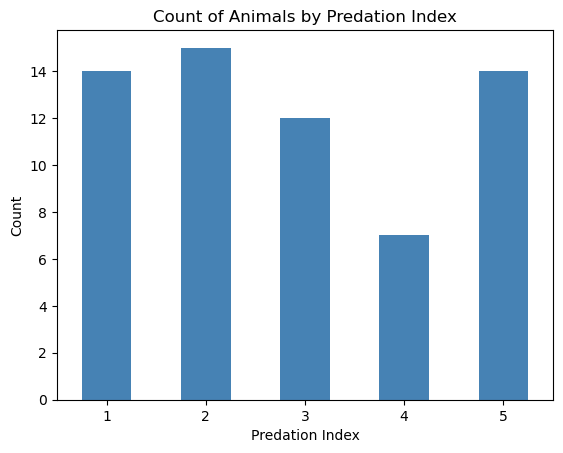

In [89]:
predation_counts = sleep_df['predation_index'].value_counts().sort_index()

# rot=0 keeps the x-axis labels horizontal
predation_counts.plot(kind='bar', 
                      title='Count of Animals by Predation Index',
                      xlabel='Predation Index',
                      ylabel='Count',
                      rot=0,
                      color='steelblue')

<Axes: title={'center': 'Distribution of Predation Index'}>

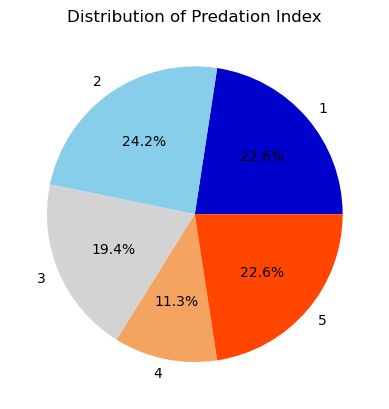

In [90]:
predation_counts.plot(kind='pie', 
                      title='Distribution of Predation Index',
                      ylabel='',  # Hide the 'predation_index' label on the left
                      autopct='%1.1f%%', # Show percentages
                      colors=custom_colors)


# Q5 - How is the "Predation Index" distributed?

Grouping non-preditory animals into groups 1 and 2 while preditory animals being catagorized with an index of 3-5, we see a fairly close distribution of preditors and prey. 47% prey (1-2) and 53% preditors (3-5).